In [1]:
import numpy as np
import ROOT
import os

In [2]:
ROOT.gInterpreter.AddIncludePath("../include")

In [3]:
ROOT.gInterpreter.Declare(
"""
#include <ROOT/RVec.hxx>
#include "CustomContainers.hh"
"""
)

True

In [4]:
ROOT.gStyle.SetOptFit()

In [5]:
loadedLib = ROOT.gSystem.Load("../lib/libCustomContainers.so")

# Unsuccessful library load.
if loadedLib < 0:
    raise ImportError(f"System flag is: {loadedLib}")

In [6]:
os.chdir("../build/SimulationResults")

In [7]:
fileName = "SimulationOutput.root"

In [8]:
simulationFile = ROOT.TFile(fileName)

In [9]:
for key in simulationFile.GetListOfKeys():
    print(key.GetName())

DriftData
PhotonConversion


# Fe-55 Spectrum

In [10]:
specHist = simulationFile.Get("PhotonConversion")

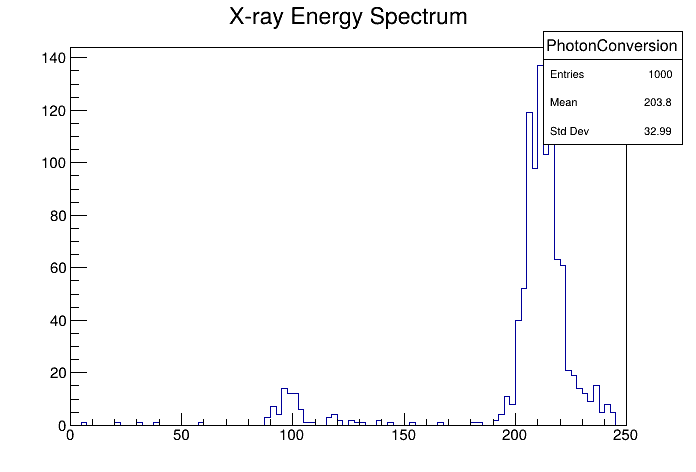

In [11]:
specCanvas = ROOT.TCanvas()

specHist.Draw()
specCanvas.Draw()

# Detector properties

In [12]:
def get_range(arr, iqr=False):
    if iqr:
        quantiles = np.quantile(arr, [0.25, 0.75])
        iqr = quantiles[1] - quantiles[0]
        range_ = (quantiles[0] - 1.5 * iqr, quantiles[1] + 1.5 * iqr)
    else:
        range_ = (arr.min(), arr.max())
    return range_

In [13]:
driftDataframe = ROOT.RDataFrame("DriftData", fileName)

In [14]:
driftDataframe.Describe()

Dataframe from TChain DriftData in file SimulationOutput.root

Property                Value
--------                -----
Columns in total           20
Columns from defines        0
Event loops run             0
Processing slots            1

Column                  Type                            Origin
------                  ----                            ------
ArrivalTimeSpread       Double_t                        Dataset
Endpoint                CustomContainer::Position4D     Dataset
Endpoint.t              Double_t                        Dataset
Endpoint.x              Double_t                        Dataset
Endpoint.y              Double_t                        Dataset
Endpoint.z              Double_t                        Dataset
Gain                    Double_t                        Dataset
InitialPoint            CustomContainer::Position4D     Dataset
InitialPoint.t          Double_t                        Dataset
InitialPoint.x          Double_t                      

In [15]:
# Useful for filtering cases of exponential overflow caused by integration of the 
# Townsend coefficients, usually caused by a large integration accuracy.
use_iqr = True

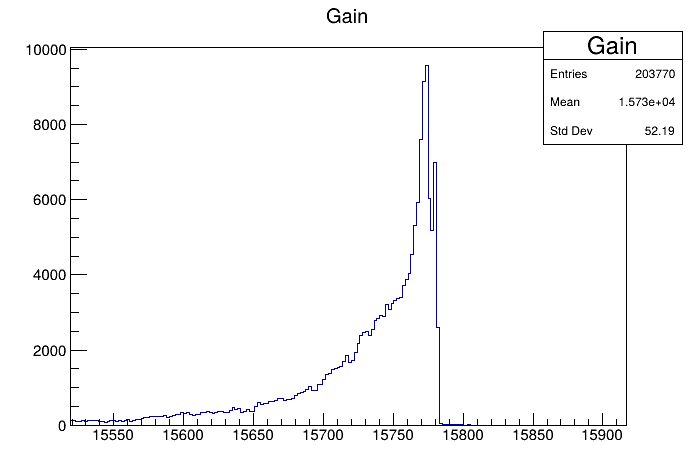

In [16]:
gainArr = driftDataframe.AsNumpy(["Gain"])["Gain"]

range_ = get_range(gainArr, iqr=use_iqr)
bin_edges = np.histogram_bin_edges(gainArr, bins="fd", range=range_)
n_bins = bin_edges.size - 1

gainHist = driftDataframe.Histo1D(("Gain", "Gain", n_bins, bin_edges), "Gain")

gainCanvas = ROOT.TCanvas()

gainHist.Draw()
gainCanvas.Draw()

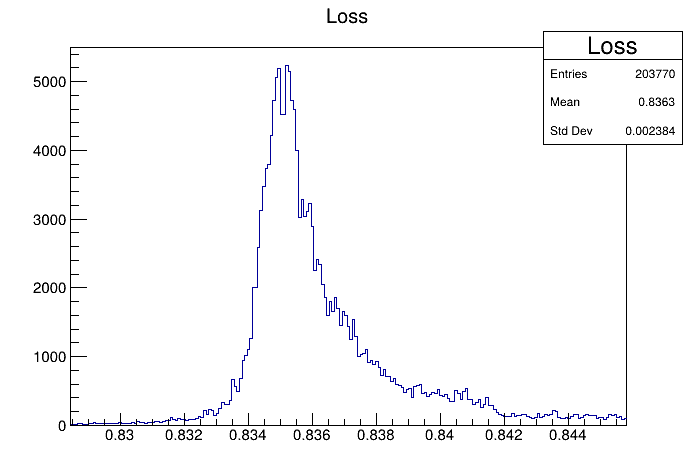

In [17]:
lossArr = driftDataframe.AsNumpy(["Loss"])["Loss"]

range_ = get_range(lossArr, iqr=use_iqr)
bin_edges = np.histogram_bin_edges(lossArr, bins="fd", range=range_)
n_bins = bin_edges.size - 1

lossHist = driftDataframe.Histo1D(("Loss", "Loss", n_bins, bin_edges), "Loss")

lossCanvas = ROOT.TCanvas()

lossHist.Draw()
lossCanvas.Draw()

Multiplication at 2100V (Expected):   1.05e+04
Multiplication at 2100V (Simulation): 1.32e+04

 FCN=11437.5 FROM MINOS     STATUS=SUCCESSFUL     20 CALLS         156 TOTAL
                     EDM=1.54239e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.46126e+03   7.63288e+00   1.09032e-02  -2.11924e-06
   2  Mean         1.31557e+04   5.95649e-02   1.01692e-05   1.10630e-05
   3  Sigma        2.35654e+01   4.41093e-02   4.41093e-02   1.98803e-03
                               ERR DEF= 0.5


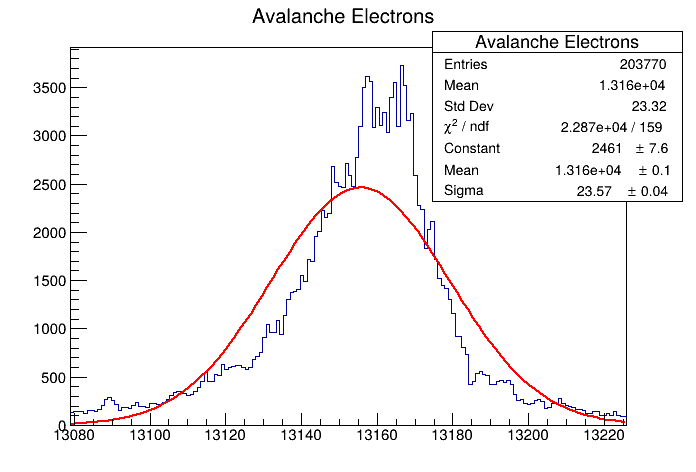

In [18]:
eleArr = driftDataframe.AsNumpy(["SizeElectrons"])["SizeElectrons"]

range_ = get_range(eleArr, iqr=use_iqr)
bin_edges = np.histogram_bin_edges(eleArr, bins="fd", range=range_)
n_bins = bin_edges.size - 1

nEleHist = driftDataframe.Histo1D(("Avalanche Electrons", "Avalanche Electrons", n_bins, bin_edges), "SizeElectrons")

nEleFit = nEleHist.Fit("gaus", "SMEL")

print(f"Multiplication at 2100V (Expected):   1.05e+04")
print(f"Multiplication at 2100V (Simulation): {nEleFit.Parameter(1):.3g}")
print()

nEleCanvas = ROOT.TCanvas()

nEleHist.Draw()
nEleCanvas.Draw()

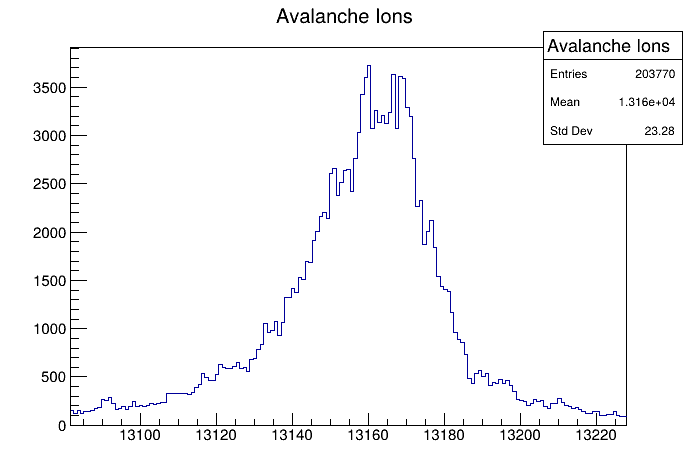

In [19]:
ionArr = driftDataframe.AsNumpy(["SizeIons"])["SizeIons"]

range_ = get_range(ionArr, iqr=use_iqr)
bin_edges = np.histogram_bin_edges(ionArr, bins="fd", range=range_)
n_bins = bin_edges.size - 1

nIonHist = driftDataframe.Histo1D(("Avalanche Ions", "Avalanche Ions", n_bins, bin_edges), "SizeIons")

nIonCanvas = ROOT.TCanvas()

nIonHist.Draw()
nIonCanvas.Draw()